> # **VOTING ENSEMBLE**
> 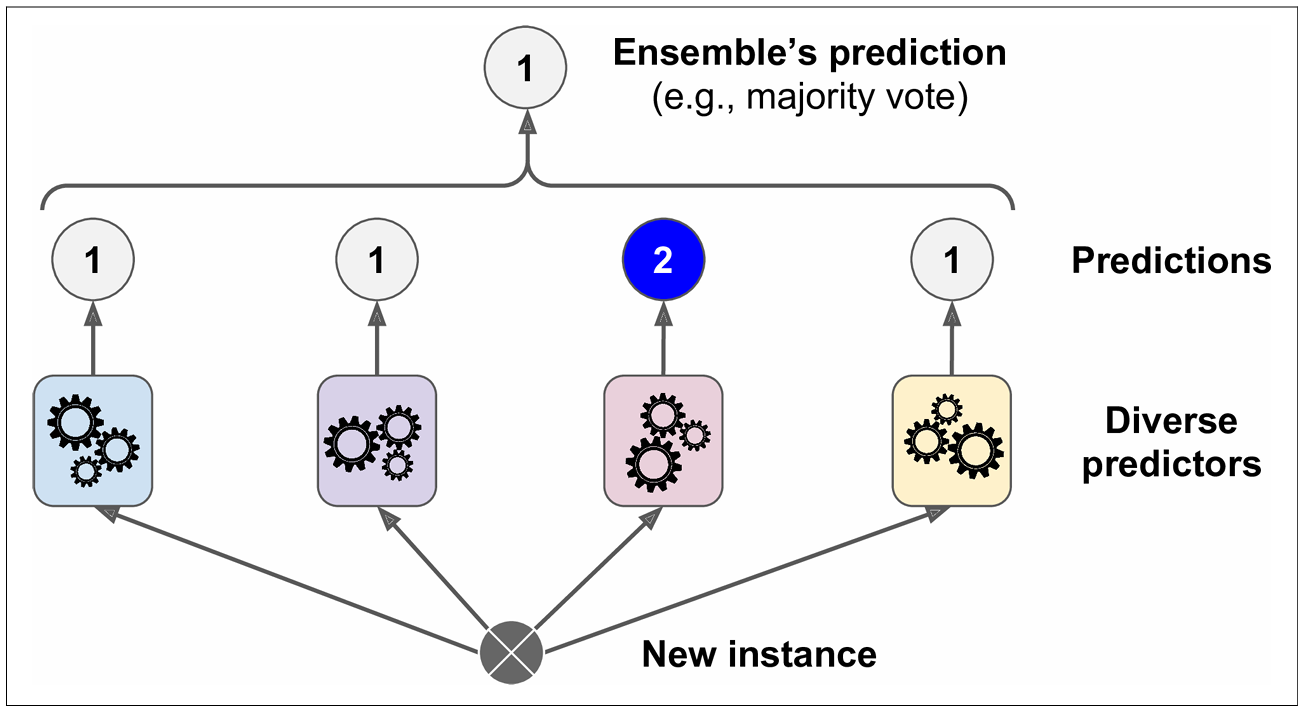
> - Suppose you ask a complex question to thousands of random people, then aggregate their answers. In many cases you will find that this aggregated answer is better than an expert’s answer. This is called the `wisdom of the crowd`. Similarly, if you aggregate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. A group of predictors is called an `ensemble`; thus, this technique is called `Ensemble Learning`, and an Ensemble Learning algorithm is called an `Ensemble method`.<br><br>
> - A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a `voting classifier`.

In [36]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [37]:
dataset = load_iris(as_frame=True)
df = pd.DataFrame(dataset.data)
df['Species'] = dataset.target
new_df = df[df['Species'] != 0][['sepal length (cm)', 'petal width (cm)', 'Species']]

X = new_df[['sepal length (cm)', 'petal width (cm)']]
y = new_df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

new_df.head()

,sepal length (cm),petal width (cm),Species
50,7.0,1.4,1
51,6.4,1.5,1
52,6.9,1.5,1
53,5.5,1.3,1
54,6.5,1.5,1


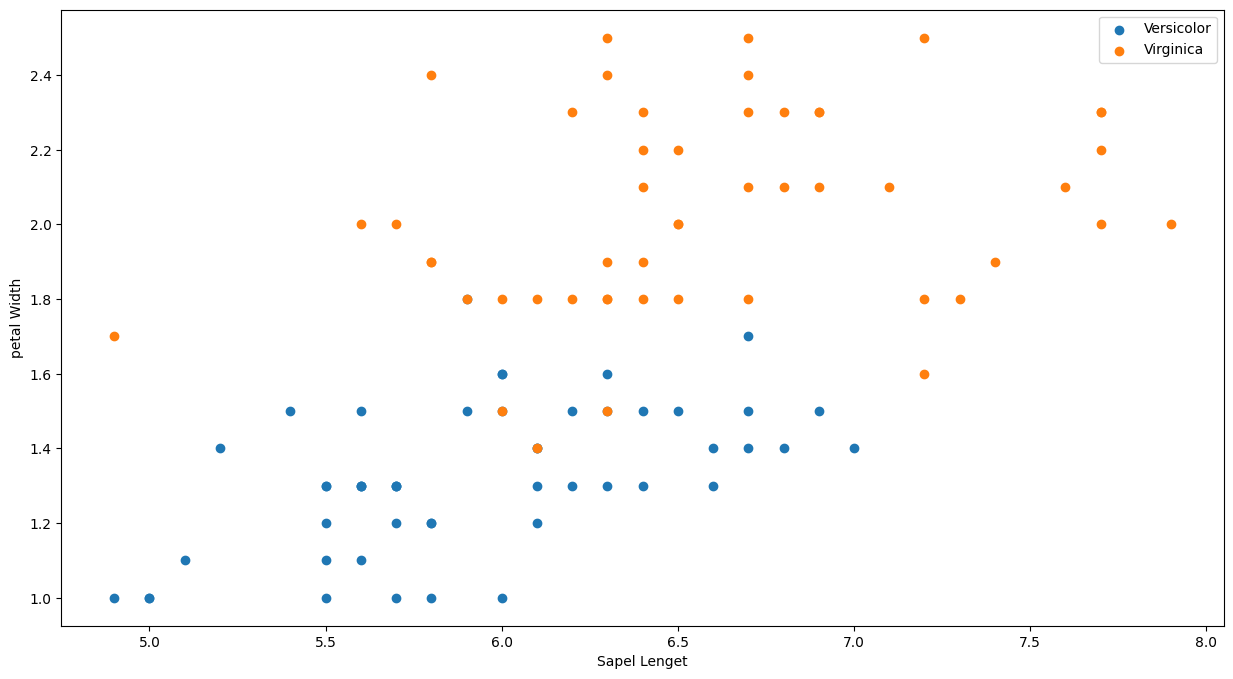

In [38]:
plt.figure(figsize=(15,8))
plt.scatter(new_df[new_df['Species'] == 1]['sepal length (cm)'], new_df[new_df['Species'] == 1]['petal width (cm)'], label = 'Versicolor')
plt.scatter(new_df[new_df['Species'] == 2]['sepal length (cm)'], new_df[new_df['Species'] == 2]['petal width (cm)'], label = 'Virginica')
plt.legend()
plt.xlabel('Sapel Lenget')
plt.ylabel('petal Width')
plt.show()

In [82]:
from sklearn.metrics import f1_score
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=2)
svc = SVC()
rf = RandomForestClassifier()

# List of models
estimators = [lr, dt, svc, rf]

# Iterate over each estimator, fit, and evaluate
for estimator in estimators:
    cvs = cross_val_score(estimator, X, y, cv=10, scoring='f1').mean()
    print(f"{estimator.__class__.__name__}: F1 Score = {cvs.round(2)}")

LogisticRegression: F1 Score = 0.93
DecisionTreeClassifier: F1 Score = 0.93
SVC: F1 Score = 0.92
RandomForestClassifier: F1 Score = 0.9


> Ensemble methods work best when the `predictors are as independent from one another as possible`. One way to get diverse classifiers is to train them using very different algorithms. This increases the chance that they will make very different types of errors, `improving the ensemble’s accuracy`.
<br><br>
<hr>

> ### HARD VOTING CLASSIFIER
> Also known as `majority voting`, each classifier votes for a class, and the class with the most votes wins. This is similar to a show of hands. Hard voting is simpler to implement, `but it can be less accurate because it ignores the confidence of each classifier's prediction`.

In [76]:
vlt_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC()),
        ('rf', RandomForestClassifier())
    ],
    voting='hard'
)

vlt_clf.fit(X_train, y_train)
# When you fit coting classifier, it clones all the estimators and fits the clones

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()), ('svc', SVC()),
                             ('rf', RandomForestClassifier())])

In [77]:
y_pred = vlt_clf.predict(X_test)
vlt_clf.score(X_test, y_test)

0.95

In [78]:
cross_val_score(vlt_clf, X, y, cv = 10, scoring='f1').mean()

0.9249494949494949

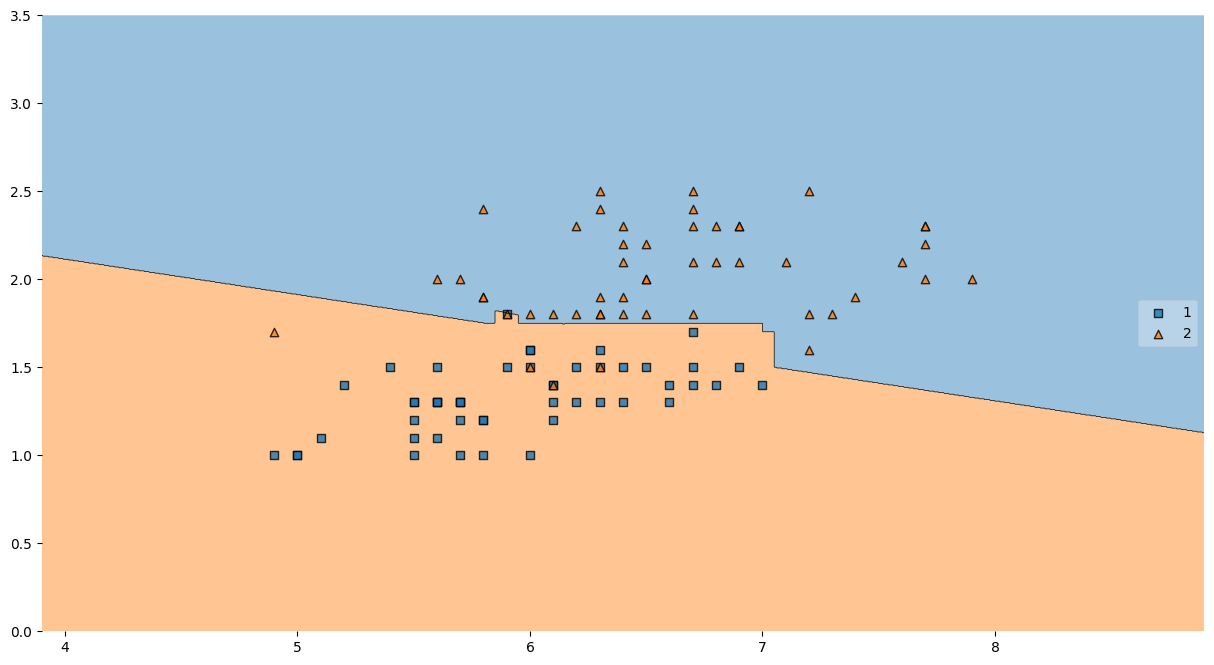

In [79]:
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 8))
plot_decision_regions(
    X.values, y.values, vlt_clf, legend=5
)
plt.show()

<hr>

> ### SOFT VOTING CLASSIFIER
> Each classifier provides a probability value that a data point belongs to a particular class. The predictions are weighted by the classifier's importance and summed up. The class with the highest average probability across all the classifiers wins the vote. This is similar to a weighted vote, where some votes carry more weight depending on the level of confidence. `Soft voting is more accurate, but it is also more complex to implement`.
<br><br>
> For performing predictions using soft voting, every individual estimators need to have `predict_prob()` method.

In [80]:
vlt_clf.voting = "soft"
vlt_clf.named_estimators["svc"].probability = True # Since SVC dont have predict_prob() method, we have to enable the `probability` hyperparameter True
vlt_clf.fit(X_train, y_train)
vlt_clf.score(X_test, y_test)

0.95

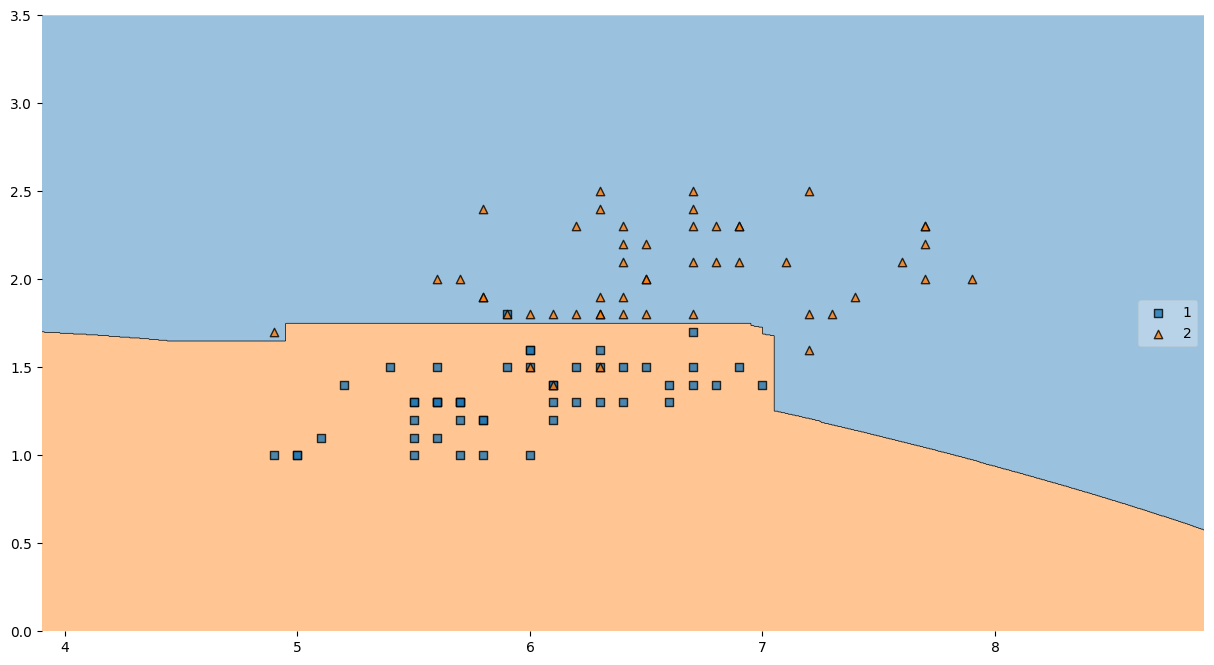

In [45]:
plt.figure(figsize=(15, 8))
plot_decision_regions(
    X.values, y.values, vlt_clf, legend=5
)
plt.show()

> As you can see the `decision boundry becomes more smoother` than hard voting.